In [36]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Web Scraping
import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = "./data/College_Data.csv"
college_data = pd.read_csv(file_path)
college_data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
college_data.rename(columns={"Unnamed: 0":"Name"}, inplace=True)
college_data.columns

Index(['Name', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [5]:
features = ["Name", "Apps", "Accept", "Grad.Rate"]

simple_data = college_data[features]
simple_data.describe()

,Apps,Accept,Grad.Rate
count,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,65.46332
std,3870.201484,2451.113971,17.17771
min,81.000000,72.000000,10.00000
25%,776.000000,604.000000,53.00000
50%,1558.000000,1110.000000,65.00000
75%,3624.000000,2424.000000,78.00000
max,48094.000000,26330.000000,118.00000


In [6]:
simple_data["Ratio"] = simple_data["Accept"] / simple_data["Apps"]
simple_data.head()

,Name,Apps,Accept,Grad.Rate,Ratio
0,Abilene Christian University,1660,1232,60,0.742169
1,Adelphi University,2186,1924,56,0.880146
2,Adrian College,1428,1097,54,0.768207
3,Agnes Scott College,417,349,59,0.836930
4,Alaska Pacific University,193,146,15,0.756477


In [7]:
simple_data.sort_values(by="Ratio", ascending=False, inplace=True)

In [8]:
simple_data[simple_data["Grad.Rate"] > 100]

,Name,Apps,Accept,Grad.Rate,Ratio
95,Cazenovia College,3847,3433,118,0.892384


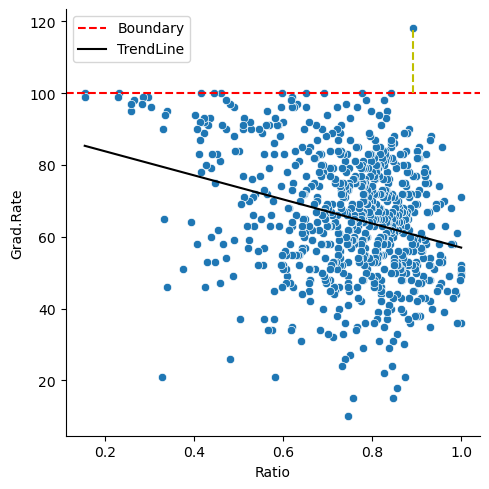

In [9]:
x = simple_data["Ratio"]
y = simple_data["Grad.Rate"]

sns.relplot(x=x, y=y, data=simple_data)
plt.axhline(y=100, color='r', linestyle='--', label='Boundary')
plt.vlines(.892, 100, 118, color='y', linestyle='--')

z = np.polyfit(x, y, deg=1)
p = np.poly1d(z)
plt.plot(x, p(x), label='TrendLine', color='black')

leg = plt.legend(loc='upper left')

### The Graph Seems to show Little Correlation Between Graduation Rate and Acceptance Rate

In [10]:
file_path = "./data/student_data/cc_institution_details.csv"
college_data_2 = pd.read_csv(file_path)
college_data_2.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [13]:
college_data_2.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

In [16]:
features = ['index', 'chronname', 'city', 'state', 'level', 'control', 
            'ft_pct', 'grad_100_value', 'grad_150_value','retain_value', ]
college_data_2 = college_data_2[features]

In [33]:
cali_colleges = college_data_2[college_data_2["state"] == "California"]
cali_colleges.shape

(350, 10)

In [45]:
html_text = requests.get('https://www.niche.com/colleges/california-baptist-university/').text
soup = BeautifulSoup(html_text, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="px-captcha" name="description"/>
  <title>
   Access to this page has been denied
  </title>
  <link href="https://s3.amazonaws.com/website.niche.com/static/partners/perimeterx/perimeterx.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <script>
   window._pxVid='';window._pxUuid='f67aefa7-16a9-11ee-85f4-78764f537257';window._pxAppId='PXZ5wgH7n9';window._pxHostUrl='/Z5wgH7n9/xhr';window._pxCustomLogo='http://a.niche.com/wp-content/themes/niche-about/images/about-home/stacked-green.svg';window._pxJsClientSrc='/Z5wgH7n9/init.js';window._pxFirstPartyEnabled=true;var script=document.createElement('script');script.src='/Z5wgH7n9/captcha/PXZ5wgH7n9/captcha.js?a=c&u=f67aefa7-16a9-11ee-85f4-78764f537257&v=&m=0';document.head.appendChild(script);script.onerror=function(){script=document.createElement('script');script.src='https://c

In [43]:
acc_rate = soup.find('div', class_='Z0LcW t2b5Cf')
print(acc_rate)

None


In [34]:
for college in cali_colleges["chronname"]:
    print(college)

Academy of Art University
ITT Technical Institute at Rancho Cordova
College of Alameda
Allan Hancock College
American Academy of Dramatic Arts, Los Angeles Campus
American Career College
American River College
Antelope Valley College
Art Center College of Design
Azusa Pacific University
Bakersfield College
Barstow Community College
Bethesda Christian University
Biola University
Brooks Institute
Bryan College at Los Angeles
Butte College
Cabrillo College
California Baptist University
California College of the Arts
California Institute of Technology
California Lutheran University
California Polytechnic State University at San Luis Obispo
Alliant International University-San Diego
California State University at Bakersfield
California State University-Stanislaus
California State University at San Bernardino
California State Polytechnic University at Pomona
California State University at Chico
California State University-Dominguez Hills
California State University at Fresno
California State